# Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Подготовительные действия

In [1]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-названий-столбцов" data-toc-modified-id="Замена-названий-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена названий столбцов</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Преобразование-данных-к-нужному-типу" data-toc-modified-id="Преобразование-данных-к-нужному-типу-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование данных к нужному типу</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-игр-выпускалось-в-разные-годы?" data-toc-modified-id="Сколько-игр-выпускалось-в-разные-годы?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько игр выпускалось в разные годы?</a></span></li><li><span><a href="#Как-менялись-продажи-по-платформам?" data-toc-modified-id="Как-менялись-продажи-по-платформам?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Как менялись продажи по платформам?</a></span></li><li><span><a href="#Актуальный-период" data-toc-modified-id="Актуальный-период-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Актуальный период</a></span></li><li><span><a href="#Какие-платформы-лидируют-по-продажам,-растут-или-падают?" data-toc-modified-id="Какие-платформы-лидируют-по-продажам,-растут-или-падают?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Какие платформы лидируют по продажам, растут или падают?</a></span></li><li><span><a href="#Постройте-ящик-с-усами" data-toc-modified-id="Постройте-ящик-с-усами-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Постройте ящик с усами</a></span></li><li><span><a href="#Как-влияют-отзывы-пользователей-и-критиков-на-продажи-внутри-одной-(популярной)-платформы?" data-toc-modified-id="Как-влияют-отзывы-пользователей-и-критиков-на-продажи-внутри-одной-(популярной)-платформы?-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Как влияют отзывы пользователей и критиков на продажи внутри одной (популярной) платформы?</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Распределение игр по жанрам</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Составляем-портрет-пользователя" data-toc-modified-id="Составляем-портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составляем портрет пользователя</a></span><ul class="toc-item"><li><span><a href="#Топ-5-платформ" data-toc-modified-id="Топ-5-платформ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Топ-5 платформ</a></span></li><li><span><a href="#Топ-5-жанров" data-toc-modified-id="Топ-5-жанров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Топ-5 жанров</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB-на-продажи-в-регионах" data-toc-modified-id="Влияние-рейтинга-ESRB-на-продажи-в-регионах-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB на продажи в регионах</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1.-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковы" data-toc-modified-id="Гипотеза-1.-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы</a></span></li><li><span><a href="#Гипотеза-2.-Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные" data-toc-modified-id="Гипотеза-2.-Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Откроем файл с данными и изучим общую информацию

In [2]:
# загружаем датасет
data = pd.read_csv('/datasets/games.csv')

# выводим общую информацию для изучения
display(data.info(memory_usage='deep'))
display(data.head())
display(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


При беглом взгляде на данные мы увидели следующие особенности в столбцах:

 - `Name` - 2 пропуска из всего датасета (0,12%) 
 - `Year_of_Release` - 1,16% пропусков. Столбец имеет неверный тип данных
 - `Genre` - 2 пропуска из всего датасета (0,12%)
 - `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` - имеют избыточный тип данных
 - `Critic_Score` - 51,32% пропусков, очень много. Столбец имеет избыточный тип данных
 - `User_Score` - 40,09% пропусков, также значительная часть. Столбец имеет избыточный тип данных
 - `Rating` - 40,78% пропусков
 
 В датасете 4 качественных и 6 количественных параметров

## Подготовка данных

### Замена названий столбцов

Приведём названия столбцов к нижнему регистру

In [3]:
# выполняем приведение
data.columns = data.columns.str.lower()

# проверяем результат
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Приведение осуществлено успешно

### Заполнение пропусков

Для того, чтобы в дальнейшем успешно выполнить поставленные задачи, нужно заполнить пропуски в данных.

Пропуски в столбцах `year_of_release`, `critic_score`, `user_score` логично заполнить индикаторным значением `-1` - так их потом будет легче фильтровать при исследовании выборок. Для столбцов `critic_score`, `user_score` также заменим значение `tbd` (о котором нас предупреждали при постановке задачи), если оно там есть, на `-1`. Заполнять данные столбцы медианой или средним категорически нельзя, т.к. это повлияет на результаты исследования, а для столбца с годом выпуска это просто лишено смысла. Заполнить нулём как столбцы `critic_score`, `user_score` мы тоже не можем, потому что рейтинг может быть нулевым и такое заполнение исказит данные.

Пропуски в столбце `rating` (равно как и значение `tbd`) мы заполним значением `RP` (Rating Pending). Это официальное значение рейтинга ESRB, присваиваемое в случае, когда с рейтингом ещё не определились (см. https://www.esrb.org/ratings-guide/). В конце-концов, если у игры 1985 года нет рейтинга, это ведь ещё не значит, что однажды его не присвоят. В нашем случае это можно также считать индикаторным значением.

В столбцах `name` и `genre` всего по два пропуска, и их мы также заполним индикаторными значениями `unname_game` и `untitled_genre`, соответственно.

In [4]:
# заполняем пропуски оптом
data.fillna(value={'name':'unnamed_game',
                   'year_of_release':-1,
                   'genre':'unnamed_genre',
                   'critic_score':-1,
                   'user_score':-1.0,
                   'rating':'RP'}, inplace=True)

# обрабатываем значение tbd (to be done)
for i in ['critic_score', 'user_score']:
    data.loc[data[i] == 'tbd', i] = -1.0

data.loc[data['rating'] == 'tbd', 'rating'] = 'RP'    

# смотрим на результат
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             16715 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

От пропусков не осталось и следа!

### Преобразование данных к нужному типу

Для автоматизации преобразования сначала составим словарь, в котором сопоставим столбцу необходимый тип данных, а после этого выполним преобразование данных в цикле. Но для начала нужно разобраться, какие типы нам нужны для наших столбцов:

- `year_of_release`: для данного столбца вполне достаточно типа `int16` 
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales`: так как значения продаж кто-то заботливо уже поделил на 10<sup>6</sup>, нам вполне достаточно типа `float16`
- `critic_score`: целые числа от -1 до 100 вполне укладываются в тип `int8`
- `user_score`: для данного столбца вполне достаточно типа `float16`

In [5]:
# сопостовляем столбцам новые типы
new_types = {
    'year_of_release':'int16',
    'na_sales':'float16',
    'eu_sales':'float16',
    'jp_sales':'float16',
    'other_sales':'float16',
    'critic_score':'int8',
    'user_score':'float16'}

# приводим данные к новым типам
for i in new_types.keys():
    try:
        data[i] = data[i].astype(new_types[i], errors='ignore')
    except:
        print(f'Приведение типов не удалось, проверьте данные в столбце {i}')

# смотрим на результат
display(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int16
genre              16715 non-null object
na_sales           16715 non-null float16
eu_sales           16715 non-null float16
jp_sales           16715 non-null float16
other_sales        16715 non-null float16
critic_score       16715 non-null int8
user_score         16715 non-null float16
rating             16715 non-null object
dtypes: float16(5), int16(1), int8(1), object(4)
memory usage: 4.4 MB


None

Приведение типов проведено успешно. Благодаря рациональному выбору типов мы смогли сэкономить 21,43% памяти.

Перед переходом непосредственно к анализу нужно проверить ещё один момент, о котором в постановке задачи не упомянуто - есть ли в нашей выборке дубликаты?

In [6]:
print(f'Количество дубликатов в таблице: {data.duplicated().sum()}')

Количество дубликатов в таблице: 0


Прекрасно, дубликатов нет. Можно переходить к расчёту суммарных продаж по всем регионам.

In [7]:
# суммируем продажи в новый столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# посмотрим 
display(data.describe().T)
display(data.head(10))

,count,mean,std,min,25%,50%,75%,max
year_of_release,16715.0,1974.177505,252.685735,-1.0,2003.000000,2007.000000,2010.000000,2016.000000
na_sales,16715.0,0.263184,0.813477,0.0,0.000000,0.080017,0.239990,41.375000
eu_sales,16715.0,0.145020,0.502930,0.0,0.000000,0.020004,0.109985,28.953125
jp_sales,16715.0,0.077637,0.308838,0.0,0.000000,0.000000,0.040009,10.218750
other_sales,16715.0,0.047333,0.186768,0.0,0.000000,0.010002,0.029999,10.570312
critic_score,16715.0,33.060844,36.299555,-1.0,-1.000000,-1.000000,70.000000,98.000000
user_score,16715.0,2.689453,4.171875,-1.0,-1.000000,-1.000000,7.300781,9.703125
total_sales,16715.0,0.533203,1.547852,0.0,0.059998,0.170044,0.469971,82.500000


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76,8.000000,E,82.500000
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,-1,-1.000000,RP,40.250000
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82,8.296875,E,35.500000
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80,8.000000,E,32.750000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,-1,-1.000000,RP,31.375000
5,Tetris,GB,1989,Puzzle,23.203125,2.259766,4.218750,0.580078,-1,-1.000000,RP,30.265625
6,New Super Mario Bros.,DS,2006,Platform,11.281250,9.140625,6.500000,2.880859,89,8.500000,E,29.796875
7,Wii Play,Wii,2006,Misc,13.960938,9.179688,2.929688,2.839844,58,6.601562,E,28.906250
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.437500,6.941406,4.699219,2.240234,87,8.398438,E,28.312500
9,Duck Hunt,NES,1984,Shooter,26.937500,0.629883,0.280029,0.469971,-1,-1.000000,RP,28.312500


### Вывод по разделу

Мы успешно привели названия столбцов к нижнему регистру, преобразовали данные к нужному типу, заполнили пропуски в данных и проверили датасет на наличие дубликатов. Данные готовы к анализу.

Возможные причины появления пропусков можем описать так:

- для столбцов с незначительным количеством пропусков () это, скорее всего, техническая ошибка или невнимательность при подготовке данных. А может быть и отсутствие данных изначально, если это какие-то редкие игры, о которых знают 3,5 человека во всём мире
- для столбцов со значительным количеством пропусков причины можно выделить следующие:
 - временная - например, для игр выпуска до 1994 рейтинг ESRB в принципе не может существовать, т.к. самой организации тогда ещё не было. То же самое и для пользовательских рейтингов и оценок критиков - их попросту негде и некому было собирать, т.к. площадок онлайн-дистрибуции и игровых изданий тогда тоже ещё не было
 - человеческий фактор - на некоторые игры могло быть лень писать рецензию и ставить рейтинг, или игра настолько плоха, что её даже оценивать не хочется (по скромному мнению отдельного игрока) и многое другое. В конце-концов, любой отзыв - это дело добровольное

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

In [8]:
# посмотрим на количество игр, выпущенных в разные годы, предварительно отфильтровав индикаторное значение
_data = data[data['year_of_release'] > 0]
display(_data.pivot_table(index='year_of_release', aggfunc={'name':'count'}))

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Кол-во изданных игр')

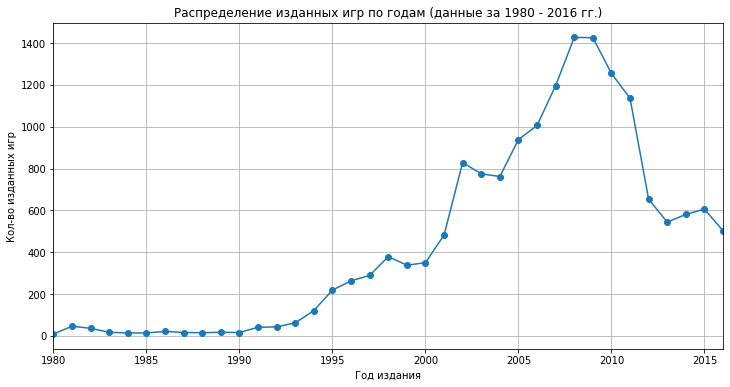

In [9]:
# посмотрим на те же данные, но уже в виде графика
ax = _data.pivot_table(index='year_of_release',aggfunc={'name':'count'}).reset_index().plot(x='year_of_release',
                                                                                            y='name',            
                                                                                            figsize=(12,6),
                                                                                            title='Распределение изданных игр по годам (данные за 1980 - 2016 гг.)',
                                                                                            grid=True,
                                                                                            legend=False,
                                                                                            style='o-')
ax.set_xlabel('Год издания')
ax.set_ylabel('Кол-во изданных игр')

Исходя из увиденного распределения, можно уверенно сказать, что для анализа нам точно нужны не все данные - данные с 1980 по 1994 год можно смело отбросить без ущерба.

### Как менялись продажи по платформам?

In [10]:
# посмотрим на суммарные продажи по платформам и выберем несколько с наибольшими суммами продаж
display(data.pivot_table(index='platform', aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS2,1256.000000
X360,971.500000
PS3,939.500000
Wii,907.500000
DS,806.000000
PS,731.000000
GBA,317.750000
PS4,314.250000
PSP,294.000000


Можно уверенно сказать, что у нас есть шестёрка лидеров - PlayStation 2, Xbox 360, PlayStation 3, Wii, Nintendo DS и классический PlayStation. Посмотрим, как менялись продажи для этих платформ с течением времени

,total_sales
year_of_release,
2000,39.156250
2001,166.375000
2002,205.375000
2003,184.375000
2004,211.750000
2005,160.625000
2006,103.437500
2007,76.000000
2008,53.906250


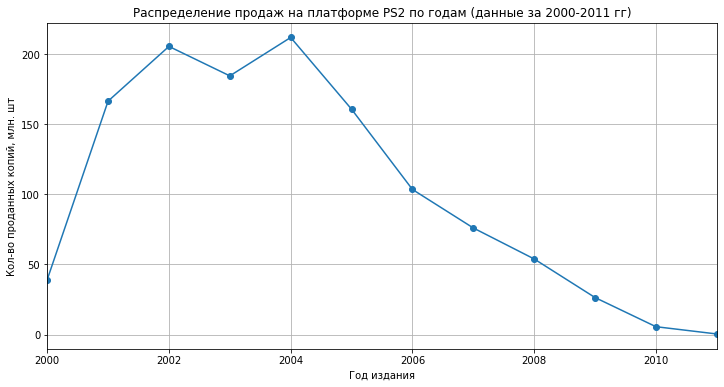

,total_sales
year_of_release,
2005,8.250000
2006,51.625000
2007,95.375000
2008,135.250000
2009,120.250000
2010,170.000000
2011,143.875000
2012,99.750000
2013,88.562500


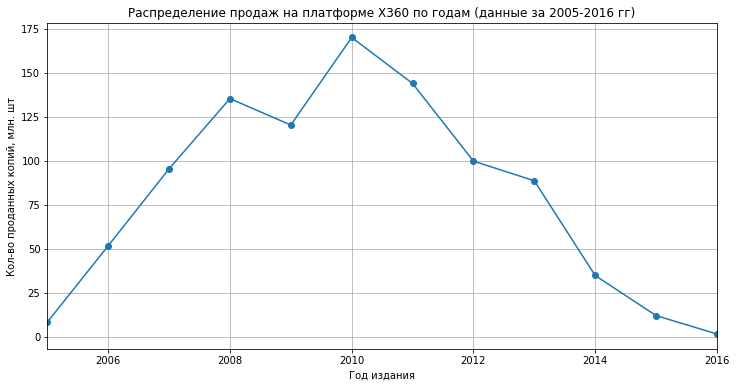

,total_sales
year_of_release,
2006,20.968750
2007,73.187500
2008,118.500000
2009,130.875000
2010,142.125000
2011,156.750000
2012,107.375000
2013,113.250000
2014,47.750000


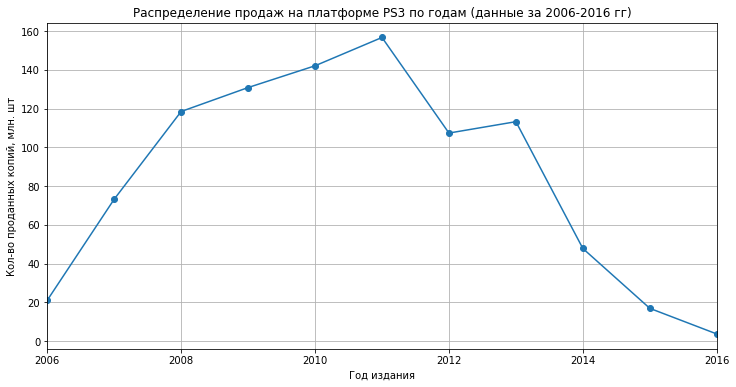

,total_sales
year_of_release,
2006,137.125000
2007,152.750000
2008,171.250000
2009,207.000000
2010,127.937500
2011,59.656250
2012,21.703125
2013,8.593750
2014,3.750000


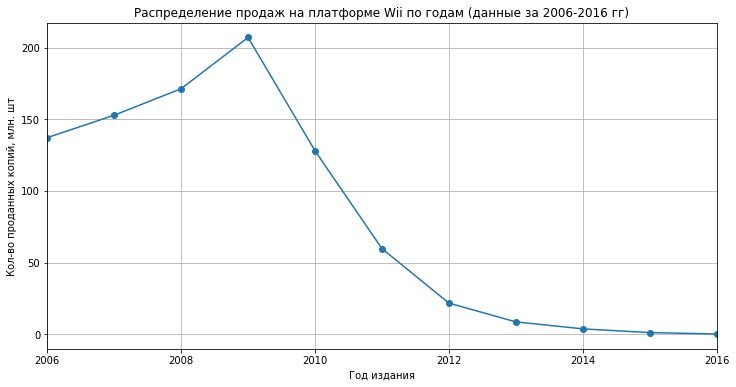

,total_sales
year_of_release,
1985,0.020004
2004,17.265625
2005,130.125000
2006,119.812500
2007,147.000000
2008,145.250000
2009,119.562500
2010,85.000000
2011,26.187500


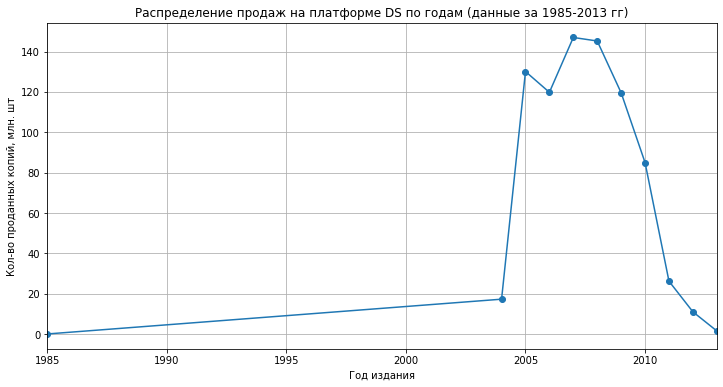

,total_sales
year_of_release,
1994,6.031250
1995,35.968750
1996,94.687500
1997,136.125000
1998,169.500000
1999,144.500000
2000,96.375000
2001,35.593750
2002,6.667969


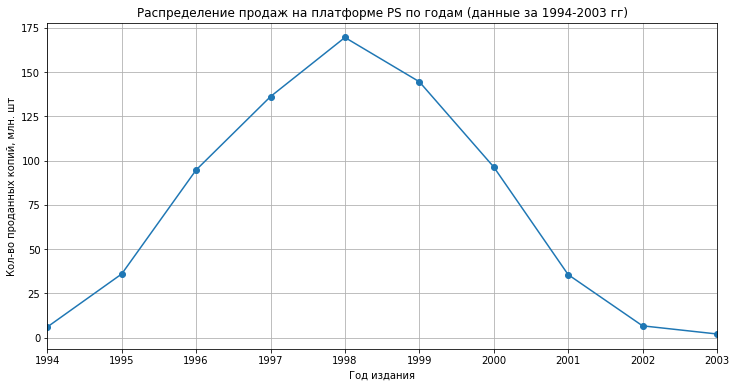

In [11]:
# напишем функцию, чтобы рисовать красивые графики
def show_pretty_chart(_data,_platform):
    _title='Распределение продаж на платформе '+_platform+' по годам (данные за '+str(_data.index.min())+'-'+str(_data.index.max())+' гг)'
    ax=_data.reset_index().plot(x='year_of_release',
                                              y='total_sales',
                                              figsize=(12,6),
                                              title=_title,
                                              grid=True,
                                              legend=False,
                                              style='o-')
    ax.set_xlabel('Год издания')
    ax.set_ylabel('Кол-во проданных копий, млн. шт')
    plt.show()

# в цикле выведем таблицу и графики изменения продаж по нашим лидерам
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    local_pivot = data.query('(year_of_release > 0) and (platform == @i)').pivot_table(index='year_of_release', aggfunc={'total_sales':'sum'})
    display(local_pivot)
    show_pretty_chart(local_pivot, i)
    

Исходя из полученных данных, можно сказать, что средний срок жизни платформы - 8 лет. 4 года на рост, 4 года на стагнацию и забвение. По графику общих продаж по всем платформам видно, что последний рост продаж начался в 2013 году, т.е. именно с этого срока и имеет смысл брать данные. Это соответствует времени начала жизненного цикла новых платформ (PlayStation 4 и Xbox One вышли именно в 2013 году). Т.е. актуальный период данных составляет 2013-2016 гг.

### Актуальный период

Сделаем срез с данными за актуальный период и сохраним его в новую переменную для удобства работы

In [12]:
actual_data = data.query('year_of_release >= 2013')

### Какие платформы лидируют по продажам, растут или падают?

In [13]:
# запишем список актуальных платформ
actual_platforms = list(actual_data['platform'].unique())

# посмотрим на суммарные продажи по актуальным платформам
display(actual_data.pivot_table(index='platform', aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS4,314.250000
PS3,181.500000
XOne,159.250000
3DS,143.250000
X360,136.750000
WiiU,64.625000
PC,39.437500
PSV,33.000000
Wii,13.664062


В топе два поколения PlayStation, два поколения Xbox и примкнувший к ним Nintendo 3DS. Довольно занятно, что 4-е поколение PlayStation обгоняет предка по продажам почти в 2 раза (разница 73,14%), тогда как Xboxы отличаются всего на 16,45%. Ну и Nintendo может по праву гордится таким соседством. Посмотрим теперь на графики изменения продаж для каждой из актуальных платформ.

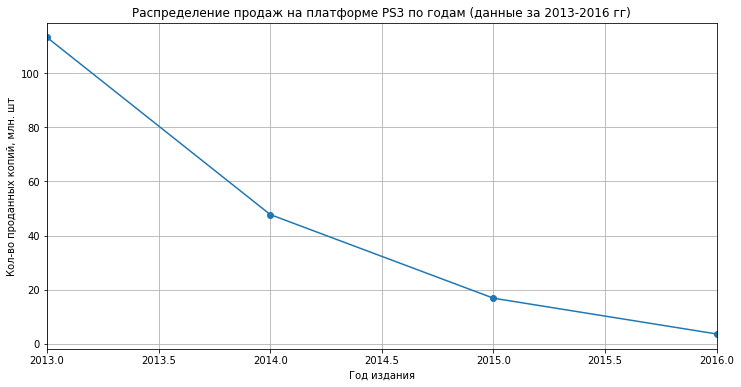

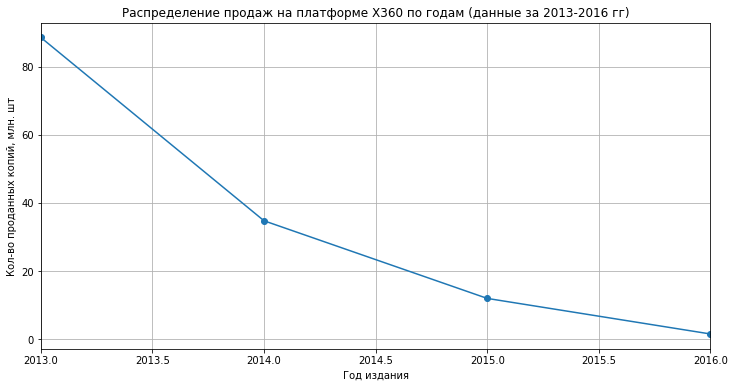

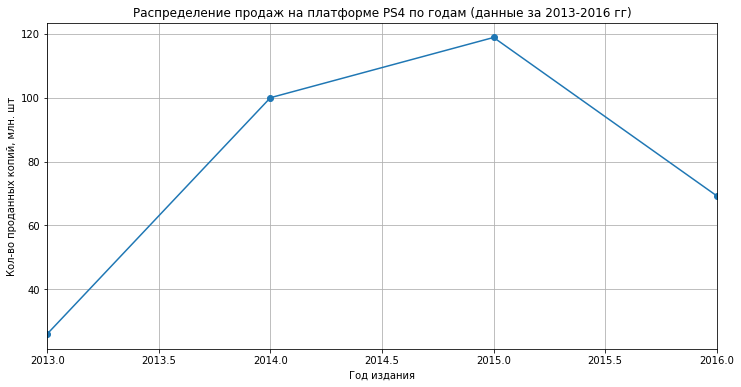

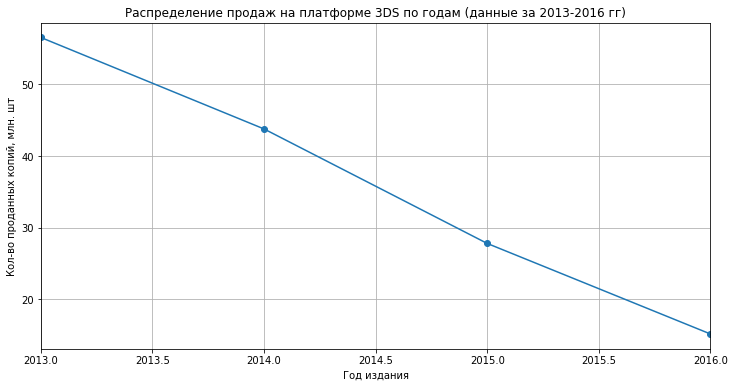

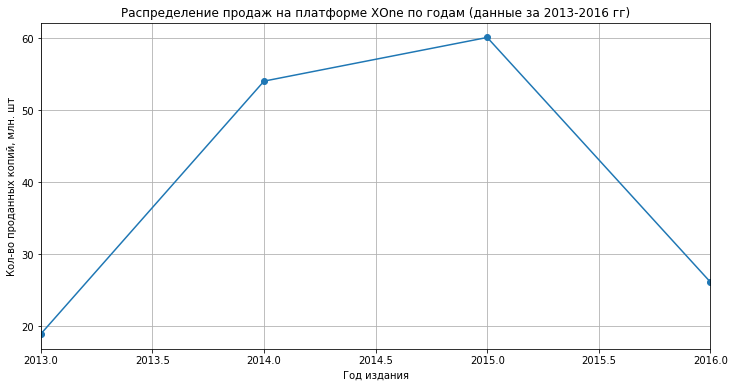

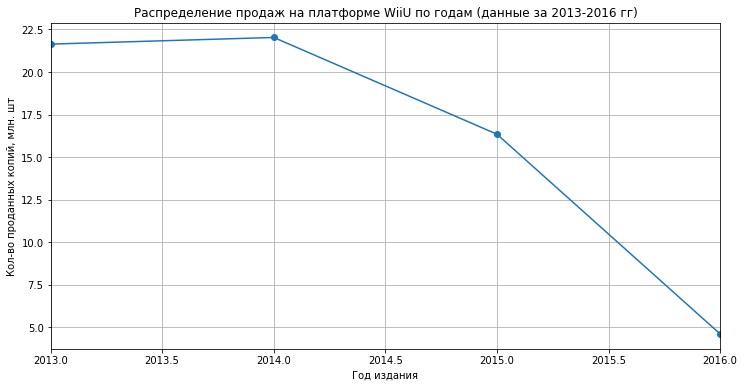

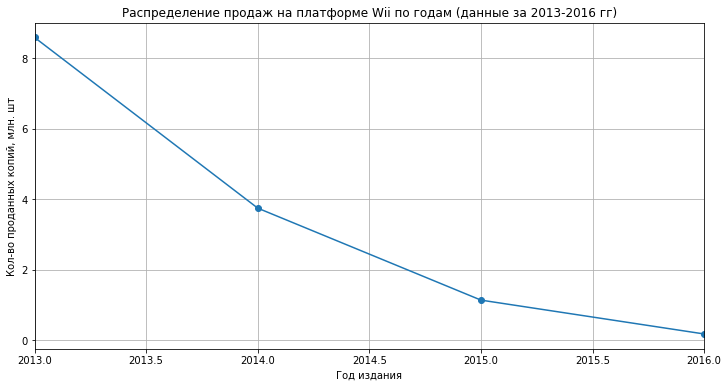

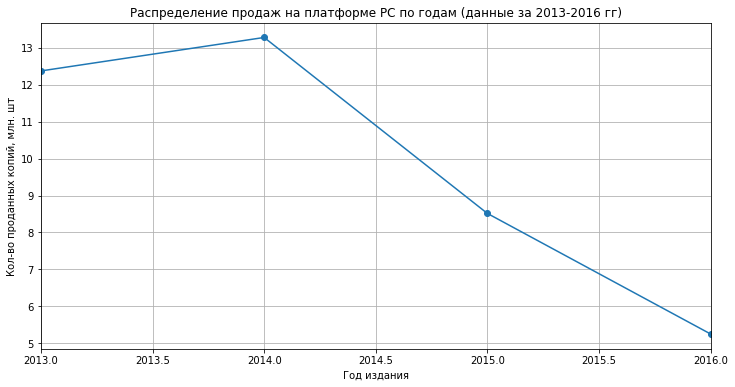

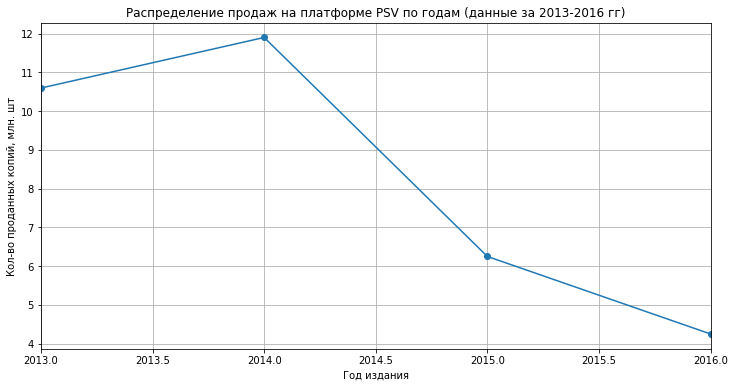

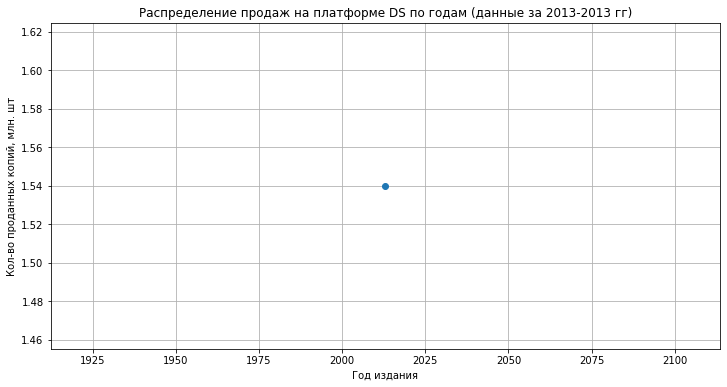

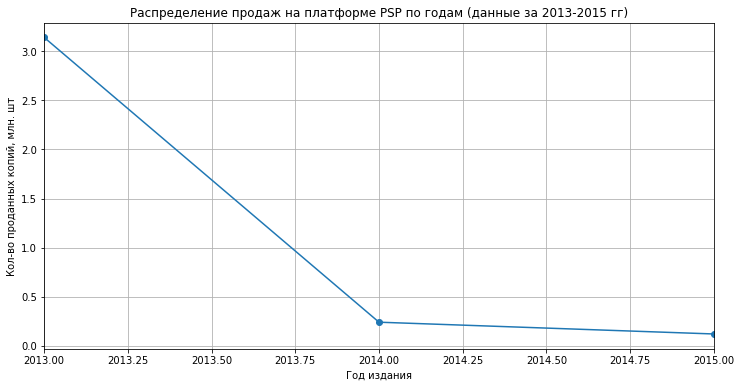

In [14]:
# построим графики в цикле
for i in actual_platforms:
    local_pivot = actual_data.query('platform == @i').pivot_table(index='year_of_release', aggfunc={'total_sales':'sum'})
    show_pretty_chart(local_pivot, i)

Итак, из графиков мы увидели следующее:

Лидируют по продажам следующие платформы:

- PS4
- PS3
- XOne
- 3DS
- X360

Учитывая, что данные за 2016-й год могут быть неполными, можно сказать, что растут следующие платформы:

- PS4
- XOne

По нашим предположениям, которые мы сделали ранее, к 2017 году эти платформы должны достигнуть пика могущества

Падают в плане продаж следующие платформы:

- PS3
- X360
- 3DS
- WiiU
- Wii
- PC
- PSV
- DS
- PSP

Потенциально прибыльными в 2017 году для нас будут:

- консоли следующего поколения PlayStation 4 и Xbox One
- "вечная" платформа PC
- платформы, которые клонятся к закату, но ещё показывают неплохие продажи: PlayStation 3, Xbox 360, Nintendo 3DS, WiiU, PlayStation Vita

### Постройте ящик с усами

Text(0, 0.5, 'Платформа')

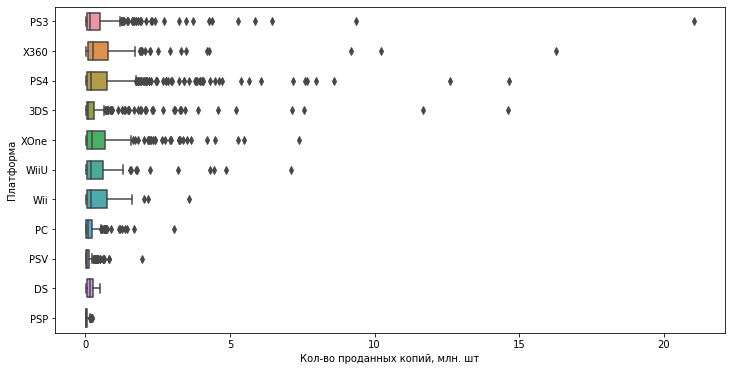

In [15]:
# строим ящики с усами по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='total_sales', y='platform', data=actual_data, width=0.6)
ax.set_title('')
ax.set_xlabel('Кол-во проданных копий, млн. шт')
ax.set_ylabel('Платформа')

Картина, которую мы получили, показывает нам интересные вещи. Если избавиться от выбросов в выборках по продажам на каждой из платформ, то в принципе получится, что Xbox 360, PlayStation 4 и Wii идут вровень. Чуть уступают им Xbox One и WiiU. А вот Nintendo 3DS уже не входит в пятёрку лидеров, в которую он попал только за счёт выбросов.

Можно предположить, что выбросы - это эксклюзивы платформ, за счёт которых и идёт основная борьба за продажи. А основной ящик везде - это мультиплатформенные игры, которые, в среднем, одинаково продаются на всех платформах.

### Как влияют отзывы пользователей и критиков на продажи внутри одной (популярной) платформы?

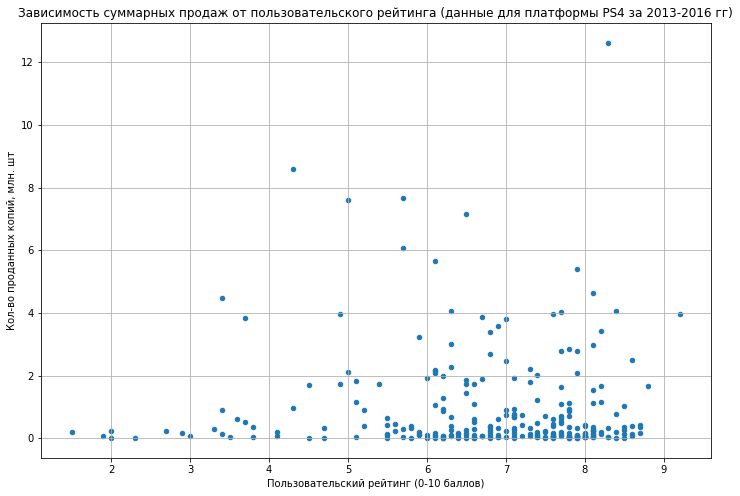

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет -0.03


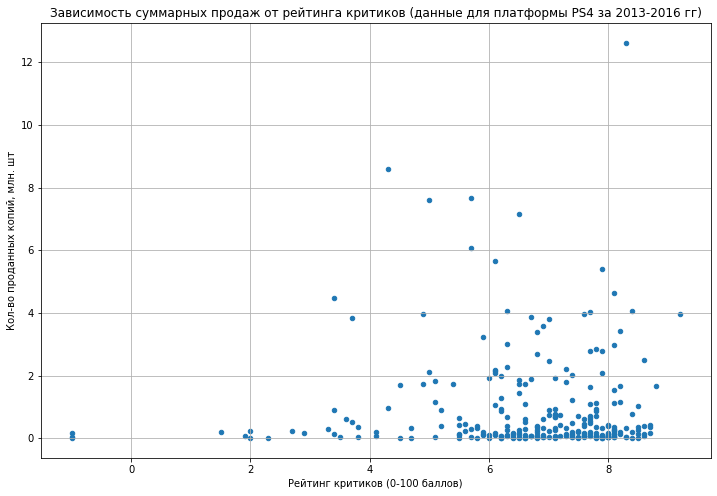

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


In [16]:
# напишем функцию для отрисовки красивых диаграмм рассеяния
def show_pretty_scatter(_data, _xname, _yname, _title, _xlabel):
    ax = _data.plot.scatter(_xname,
                            _yname,
                            figsize=(12,8),
                            grid=True)
    ax.set_title(_title)
    ax.set_xlabel(_xlabel)
    ax.set_ylabel('Кол-во проданных копий, млн. шт')
    plt.show()

# напишем функцию для изучения влияния рейтингов на продажи
def score_influence(_platform):
    title=f'Зависимость суммарных продаж от пользовательского рейтинга (данные для платформы {_platform} за 2013-2016 гг)'
    xlabel='Пользовательский рейтинг (0-10 баллов)'
    local_data = actual_data.query('(platform == @_platform) and (user_score.notna()) and (user_score > 0)')
    show_pretty_scatter(local_data, 'user_score', 'total_sales', title, xlabel)
    corr = round(local_data['total_sales'].corr(_data['user_score']), 2)
    print(f'Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет {corr}')
    title=f'Зависимость суммарных продаж от рейтинга критиков (данные для платформы {_platform} за 2013-2016 гг)'
    xlabel='Рейтинг критиков (0-100 баллов)'
    local_data = actual_data.query('(platform == "PS4") and (critic_score.notna()) and (critic_score > 0)')
    show_pretty_scatter(local_data, 'user_score', 'total_sales', title, xlabel)
    corr = round(local_data['total_sales'].corr(_data['critic_score']), 2)
    print(f'Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет {corr}')

# оценим влияние для платформы PlayStation 4
score_influence('PS4')

Исходя из полученных данных можно сделать следующие выводы:

- зависимость между пользовательским рейтингом и суммарными продажами либо отсутствует вовсе, либо её характер нелинеен
- зависимость между рейтингом критиков и суммарными продажами присутствует, она явно выражена, но её характер больше похож на экспоненциальный

В целом, картина укладывается в реальность - игры для платформы PlayStation 4 стоят очень недёшево, и, чтобы минимизировать свои риски, основная масса геймеров предпочитает принимать решение о покупке основываясь на мнениях авторитетных изданий (которые, как правило, основываются на развёрнутом ревью), а не на мнении рандомных пользователей сети. По поводу экспоненциальной зависимости могу предположить, что тут имеет место такое явление как искусственное завышение оценок критиками для некоторых игр, вследствие чего они неплохо продаются на старте.

Посмотрим на картину по другим платформам

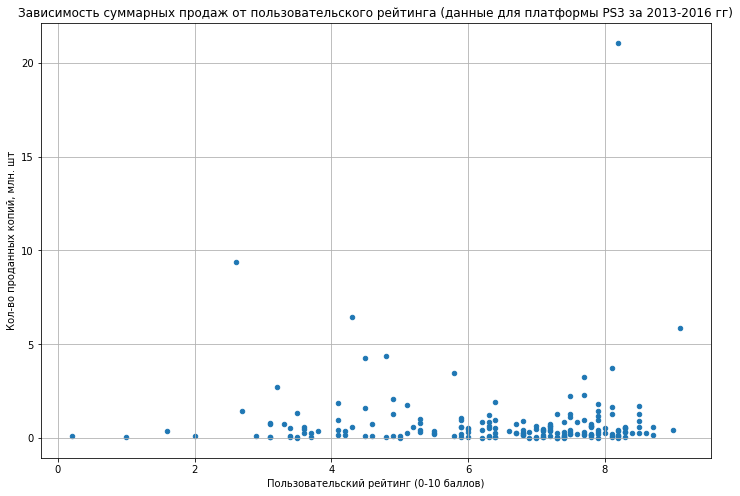

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет 0.0


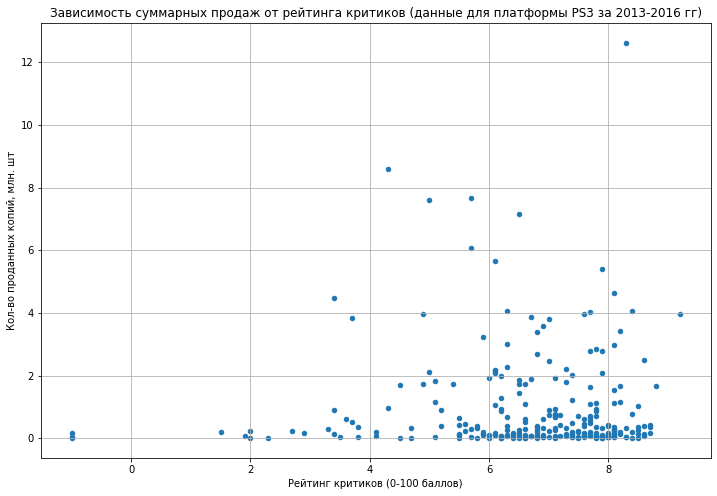

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


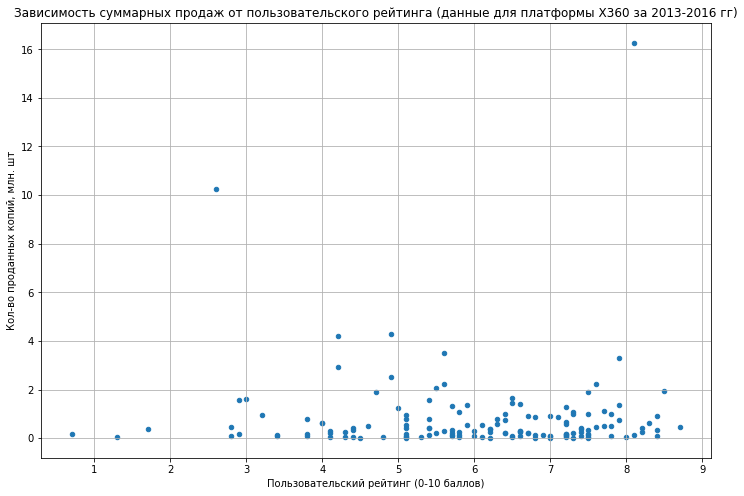

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет -0.01


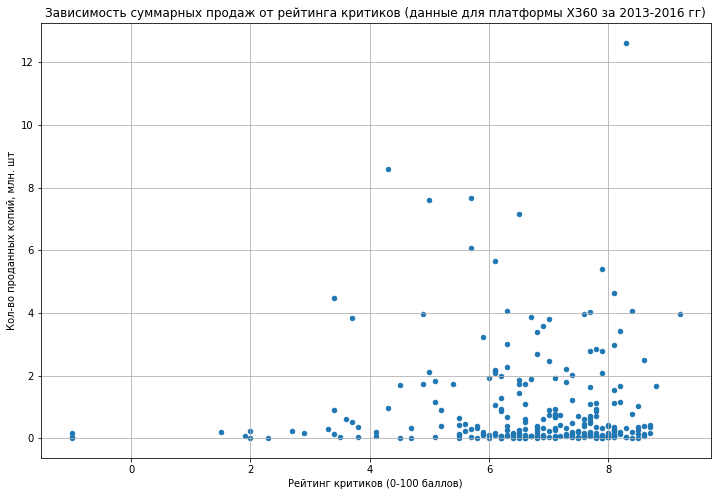

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


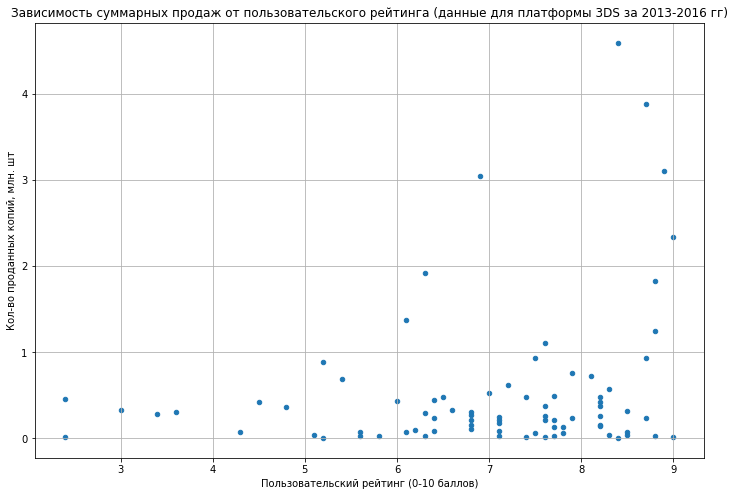

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет 0.24


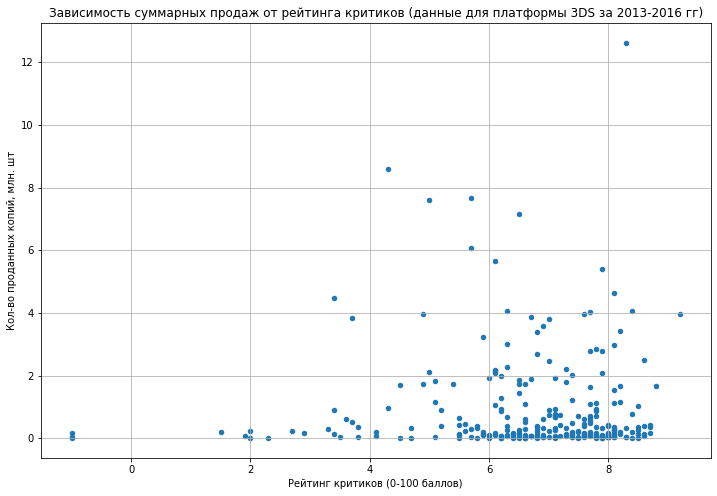

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


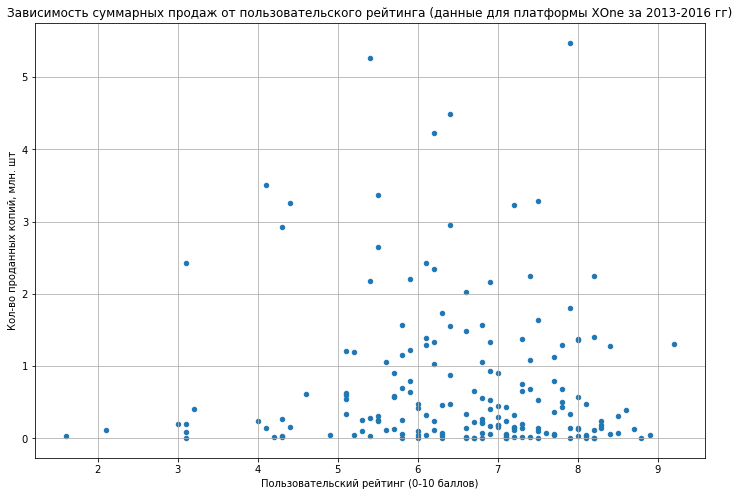

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет -0.07


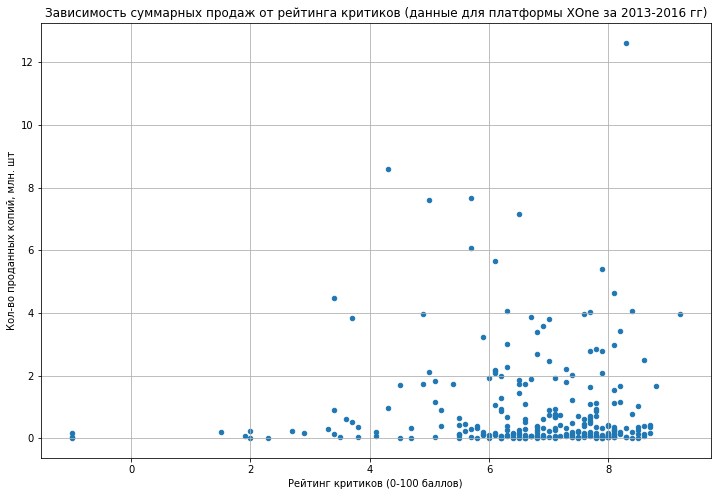

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


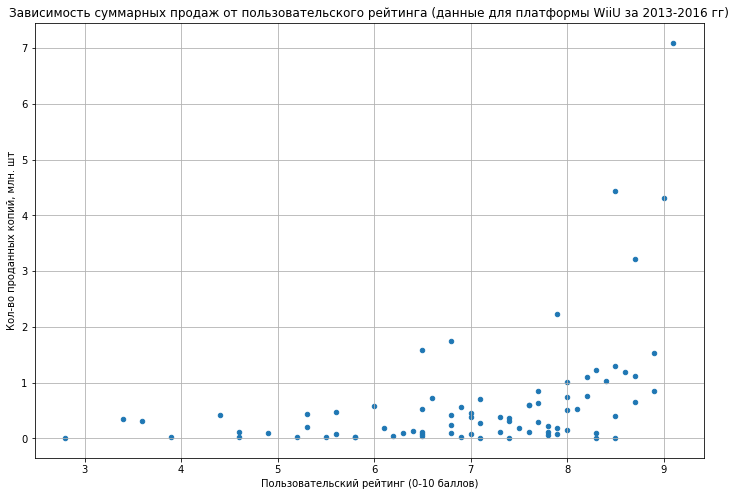

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет 0.42


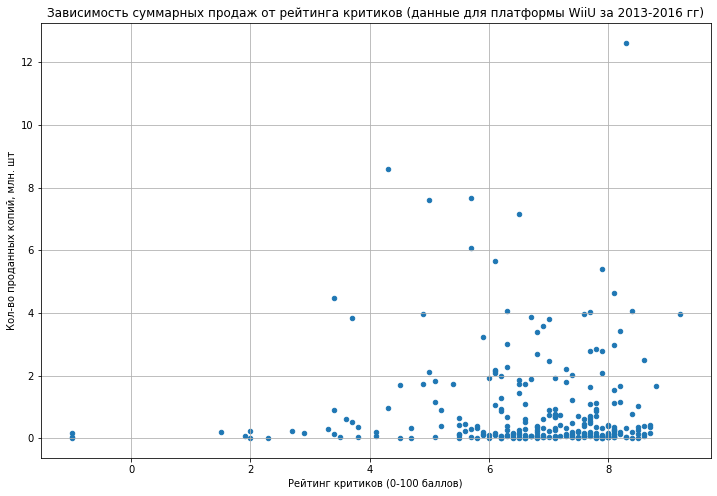

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


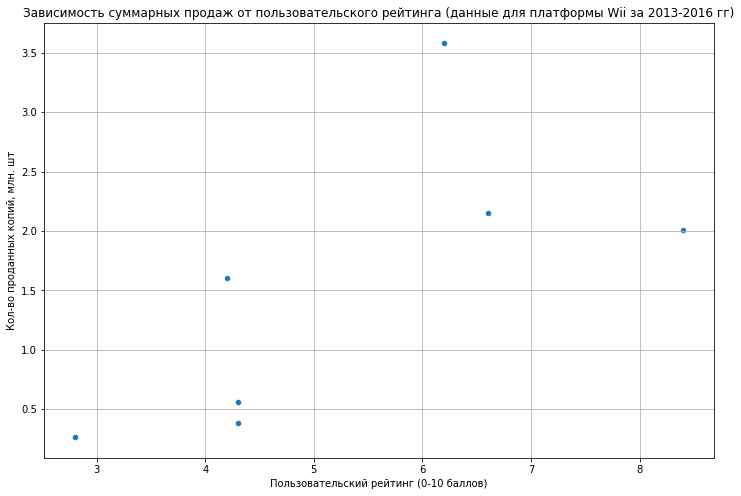

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет 0.68


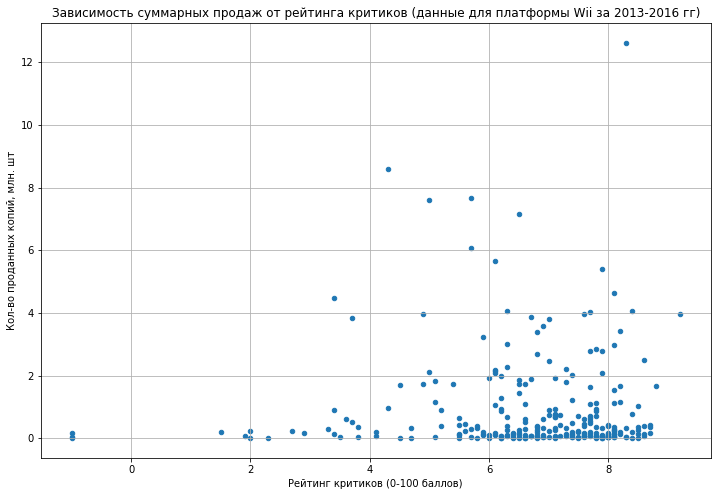

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


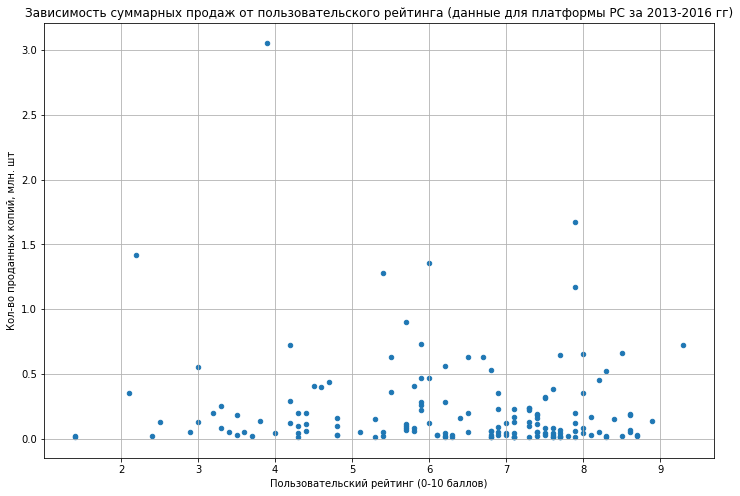

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет -0.09


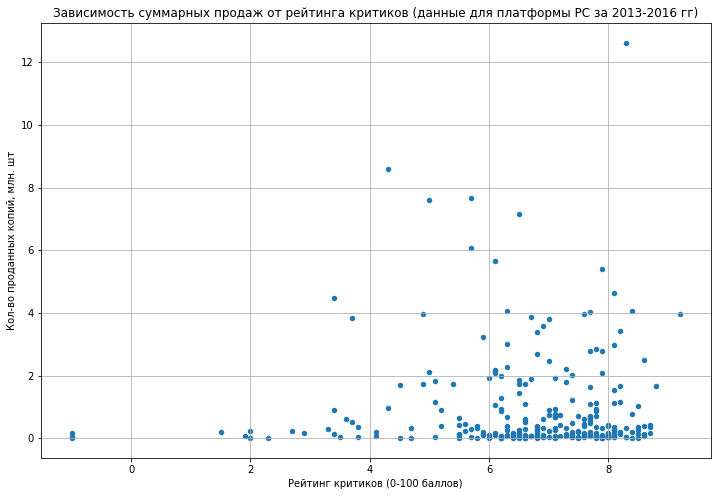

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


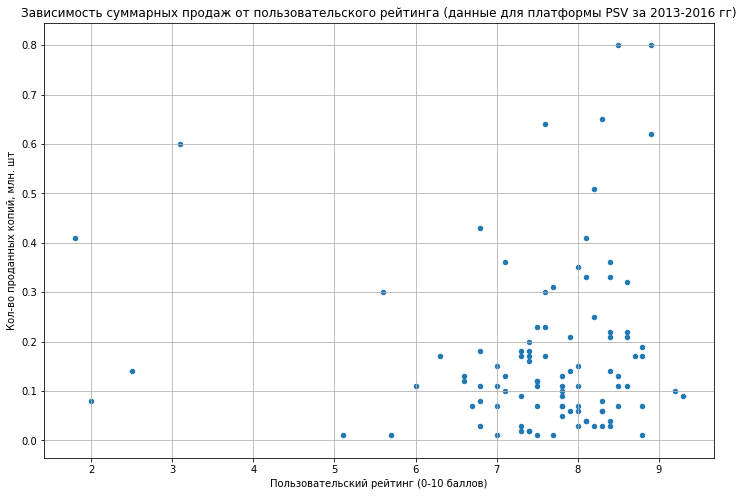

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет 0.0


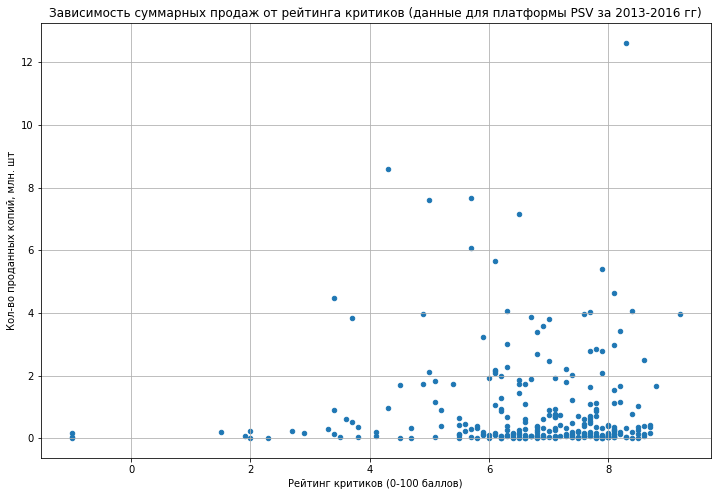

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


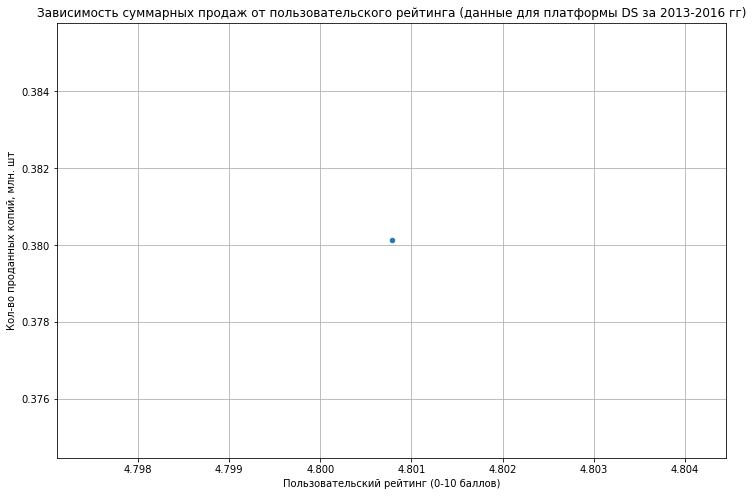

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет nan


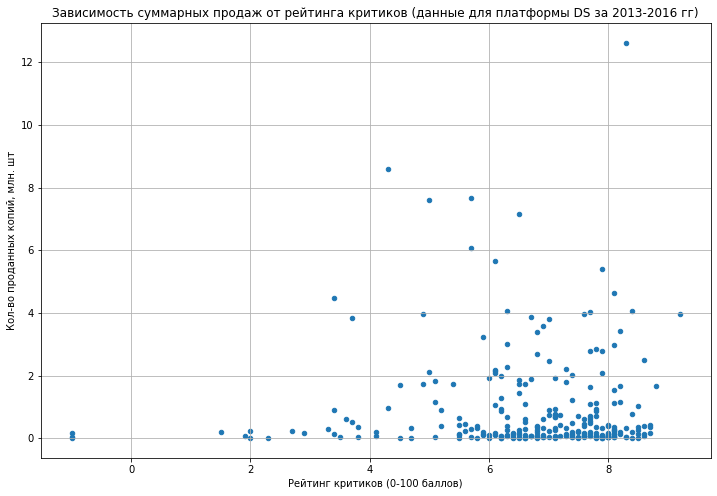

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


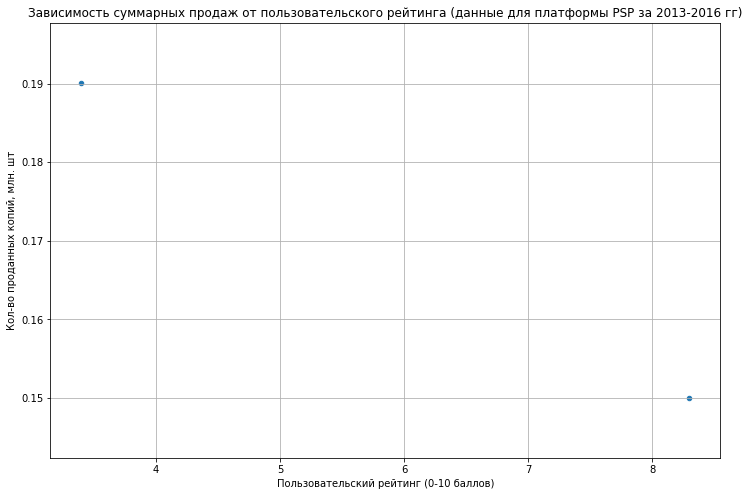

Коэффициент корреляции между пользовательским рейтингом и суммарными продажами составляет -1.0


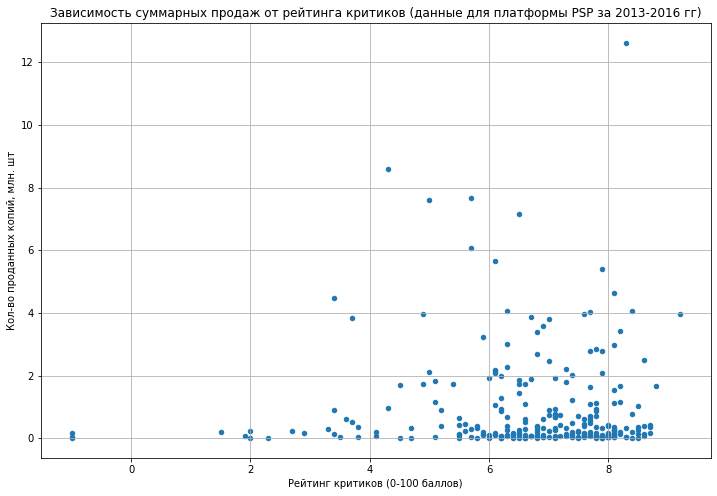

Коэффициент корреляции между рейтингом критиков и суммарными продажами составляет 0.41


In [17]:
for i in actual_platforms:
    if i != 'PS4':
        score_influence(i)

По остальным платформам ситуация следующая:

- зависимость между рейтингом критиков и суммарными продажами можно считать идентичной для всех платформ. Коэффициент корреляции одинаковый по всем платформам - 0,41
- зависимость между пользовательским рейтином и суммарными продажами для разных платформ отличается:
 - для PlayStation 3, Xbox 360, Xbox One, PC, PlayStation Vita ситуация псхожая с PlayStation 4. Рискну предположить, что примерно по тем же причинам - дорогие игры требуют тщательного выбора на основании источников, которые заслуживают доверия, а не на мнении таких же пользователей
 - Nintendo DS - с оценкой зависимости продаж от пользовательского рейтинга ничего не выйдет - у нас всего одна точка на графике. Видимо, пользователи этой платформы рейтингов не ставят и отзывов не пишут
 - PlayStation Portable - всего две точки на графике, недостаточно для достоверной оценки, но по этим данным получается обратная корреляция - чем выше пользовательский рейтинг, тем меньше продажи)
 - Nintendo 3DS показывает уже зарождающуюся зависимость продаж от пользовательского рейтинга, коэффициент корреляции 0,24
 - для WiiU коэффициент корреляции по зависимости от пользовательского рейтинга уже чуть-чуть выше (0,42), чем для зависимости от рейтинга критиков!
 - наконец, у Wii зависимость продаж от пользовательского рейтинга уже серьёзная - коэффициент корреляции 0,68
 
Выводы из исследования этих зависимостей можно сделать примерно следующие - для получения стабильной прибыли по топовым платформам нужно закупать те игры, которые имеют высокие рейтинги от критиков. Читаем свежие ревью от именитых сайтов, мониторим рейтинги и получаем свой доход.
Исключение составляют портативные платформы от Nintendo - там с мнением пользователей нужно считаться. Скорее всего это связано с довольно узким охватом этих платформ, откуда вытекает очень дружное комьюнити игроков, которые дают молниеносную обратную связь и всегда готовы проголосовать рублём (или йеной?). Если решимся в дальнейшем продавать игры для этих платформ, придётся регистрироваться на профильных площадках и вникать в эту кухню. Одними рейтингами критиков тут не обойдёшься.

### Распределение игр по жанрам

In [18]:
# посмотрим на табличку с количеством игр и суммарной выручкой по жанрам
display(actual_data.pivot_table(index='genre', aggfunc={'name':'count', 'total_sales':'sum'}).sort_values(by='total_sales', ascending=False))

# посмотрим внимательно на столбец с суммарной выручкой
actual_data.pivot_table(index='genre', aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).describe()

,name,total_sales
genre,,
Action,766,322.000000
Shooter,187,233.000000
Sports,214,150.625000
Role-Playing,292,145.875000
Misc,155,62.843750
Platform,74,42.625000
Racing,85,39.906250
Fighting,80,35.312500
Adventure,245,23.640625


,total_sales
count,12.000000
mean,90.937500
std,101.125000
min,3.169922
25%,23.171875
50%,41.265625
75%,147.062500
max,322.000000


Итак, мы видим, что самые прибыльные жанры это Action, Shooter, Sports, Role-Playing. В принципе, закономерно.

- Action и Shooter - соревновательные жанры, в основном заточенные под мультиплеер, отсюда и высокие продажи - людям нравится соревноваться с себе подобными
- Sports туда же, плюс добавим повышенный охват - в эти игры можно играть вдвоём на одной консоли во время сопутствующего досуга
- Role-Playing традиционно пользуется большим спросом - многие хотят окунуться в необычную атмосферу, ассоциировать себя с протагонистом, попробовать разные способы и алгоритмы прокачки. Плюс к этому, как правило, высокая реиграбельность - можно перепроходить сколько угодно, выбирая разные квесты, разных персонажей, навыки и т.д.

Выделяются ли жанры с высокими и низкими продажами? Да.

- Sports, Action и Shooter можно считать жанрами с высокими продажами - их продажи превышают значения продаж всех остальных 75% жанров. Выше мы уже описали почему
- Simulation, Strategy и Puzzle можно считать группой с низкими продажами, значения продаж этих жанров меньше, чем у остальных 75%. Причины просты - высокий порог вхождения, необходимость большой вовлечённости и особого склада ума, а в случае с Simulation - как правило необходимость докупать дорогостоящие игровые девайсы, чтобы добится погружения (или чтобы в принципе можно было хоть как-то играть, особенно в случае с симуляторами пилотирования). В эти жанры не приходят на часок в день, чтобы отвлечься после работы, отсюда и более узкая аудитория, и, соответственно, низкие продажи.

### Вывод по разделу

Мы увидели, что с 1994 года начинается бурный рост игровой индустрии - продажи непрестанно растут вплоть до 2008 года, когда общий экономический кризис добрался и до индустрии видеоигр. Продажи начинают неуклонно падать, пока положение дел не спасает выход нового поколения консолей от мировых лидеров - Sony PlayStation 4 и Microsoft Xbox One в 2013 году. Поэтому, несмотря на ностальгию, данные до 1994 года нас не интересуют от слова совсем.

Затем мы посмотрели на изменение продаж со временем для самых прибыльных платформ, и выяснили, что платформа живёт 8 лет - 4 года она развивается и показывает постоянный прирост продаж, ещё четыре года спад продаж и стагнация, а потом и забвение. Исходя из этого, а также обнаруженной новой точки роста продаж, мы ещё больше сузили актуальный для нас период - 2013-2016 год, первая половина жизненного цикла консолей нового поколения.

Посмотрели на продажи и их изменение по времени за актуальный период, посмотрели ящик с усами по каждой платформе, увидели, как нелегко даётся платформам их прибыль - приходится постоянно выдавать какие-то эксклюзивы, чтобы получать выдающиеся значения продаж.

Изучили, как влияют отзывы пользователей и критиков, и поняли, что для портативных консолей от Nintendo отзывы пользователей порой более значимы, чем отзывы критиков, тогда как для остальных платформ погоду делают только критики.

Посмотрели на распределение игр по жанрам, и даже поняли, почему у нас нет новых Red Alert или Command & Conquer, зато новая FIFA выходит каждый год.

## Составляем портрет пользователя

### Топ-5 платформ

In [19]:
# выведем топ-5 платформ по суммарным продажам для регионов NA, EU, JP
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data.pivot_table(index='platform', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).head().reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 2) * 100
    display(local_data)

,platform,na_sales,share
0,PS4,108.75000,28.0
1,XOne,93.12500,24.0
2,X360,81.62500,21.0
3,PS3,63.50000,16.0
4,3DS,38.21875,10.0


,platform,eu_sales,share
0,PS4,141.125000,42.0
1,PS3,67.812500,20.0
2,XOne,51.593750,15.0
3,X360,42.531250,13.0
4,3DS,30.953125,9.0


,platform,jp_sales,share
0,3DS,67.812500,50.0
1,PS3,23.343750,17.0
2,PSV,18.593750,14.0
3,PS4,15.960938,12.0
4,WiiU,10.882812,8.0


Что мы видим?

Северная Америка и Европа в целом схожи - в топ-5 одни и те же платформы. Лидер продаж в обоих регионах это PlayStation 4, причём в Европе продажи по этой платформе выше на 29,8%. 2, 3 и 4 места различаются:
- в Северной Америке в тройке лидеров ожидаемо оба поколения Xbox, всё-таки родной продукт, на 4-м PlayStation 3
- в Европе - третье поколение PlayStation и свежий Xbox.

Замыкает топ в обоих регионах Nintendo 3DS.
Говоря о количественных показателях, отличия по регионам в целом тоже предсказуемы: продажи по обоим поколениям XBox в Северной Америке почти в два раза выше, чем в Европе на тех же платформах (на 80,5% для Xbox One и 91,9% для Xbox 360).

Японский регион ожидаемо патриотичен - только родные платформы. На первом месте Nintendo 3DS (продажи почти такие же, как суммарно в СА и Европе). Картина просто потрясающая - продажи выше практически в 3 раза, чем у ближайшего преследователя, и, к тому же, всего на 1,41% ниже, чем суммарные продажи всех остальных платформ в рейтинге. 
Со 2-го по 4-е место платформы от Sony: PlayStation 3, PlayStation Vita, PlayStation 4.
Замыкает топ WiiU.
Самое характерное отличие от топов по другим регионам - 3 из 5 позиции в топе занимают платформы для мобильного гейминга. Также интересно, что в отличие от СА и Европы, консоль последнего поколения всего лишь на 4-й строчке рейтинга, а её предшественница - на втором. Всё это необходимо будет учесть при наполнении витрины японского сектора нашего магазина.

### Топ-5 жанров

In [20]:
# выведем топ-5 жанров по суммарным продажам для регионов NA, EU, JP
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data.pivot_table(index='genre', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).head().reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 2) * 100
    display(local_data)

,genre,na_sales,share
0,Action,126.062500,34.0
1,Shooter,109.750000,29.0
2,Sports,65.250000,17.0
3,Role-Playing,46.406250,12.0
4,Misc,27.484375,7.0


,genre,eu_sales,share
0,Action,118.12500,36.0
1,Shooter,87.87500,27.0
2,Sports,60.53125,19.0
3,Role-Playing,36.96875,11.0
4,Racing,20.18750,6.0


,genre,jp_sales,share
0,Role-Playing,51.031250,44.0
1,Action,40.500000,35.0
2,Misc,9.203125,8.0
3,Fighting,7.648438,7.0
4,Shooter,6.609375,6.0


Как и в случае с платформами, Северная Америка и Европа показали практически идентичную картину. Первые четыре места совпадают с выводами, которые мы получили при общей оценке распределения общих продаж по жанрам. На пятом месте по Северной Америке жанр Misc, в Европе - Racing.

Япония же опять идёт своим путём, в рамках своих культурных особенностей. На первом месте - Role-playing, на втором Action. После этого резкий провал по значения продаж (жанр Misc на третьем месте продаётся в 4,4 (!) раза хуже, чем Action) и дальше по ниспадающей.

### Влияние рейтинга ESRB на продажи в регионах

Рассмотрим, влияет ли рейтинг ESRB на продажи в отедльном регионе

In [21]:
# выведем сводную таблицу суммарных продаж для регионов NA, EU, JP по рейтингу ESRB
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    local_data = actual_data.pivot_table(index='rating', aggfunc={i:'sum'}).sort_values(by=i, ascending=False).reset_index()
    local_data['share'] = round(local_data[i] / local_data[i].sum(), 2) * 100
    display(local_data)

,rating,na_sales,share
0,M,165.25000,38.0
1,RP,89.43750,20.0
2,E,79.06250,18.0
3,E10+,54.25000,12.0
4,T,49.78125,11.0


,rating,eu_sales,share
0,M,145.3750,37.0
1,E,83.3750,21.0
2,RP,78.9375,20.0
3,E10+,42.6875,11.0
4,T,41.9375,11.0


,rating,jp_sales,share
0,RP,85.062500,60.0
1,T,20.593750,15.0
2,E,15.140625,11.0
3,M,14.109375,10.0
4,E10+,5.890625,4.0


Как и в предыдущих исследованиях, Северная Америка и Европа показывают скожую картину. Основную долю рынка составляют игры с рейтингом M. Это логично, т.к. все игры самых популярных жанров содержат сцены насилия, вид крови, и т.д. На втором месте стоят игры с рейтингом E и RP (доли продаж очень близки, поэтому можно поставить их на одну ступень пьедестала). Это тоже логично - если у игры стоит рейтинг E или он пока не определён (RP), то продажам ничто не мешает - возрастной ценз отсутствует, отсюда и самый максимальный охват. На третьем месте стоят игры с рейтингом E10+ и T (доли продаж опять же очень близки).

Для Японии большую долю рынка составляют игры с рейтингом RP - т.е. без рейтинга. Предположу, что это связано с тем, что в Японии много неких локальных игр, которые за пределом региона не интересны или не продаются, поэтому и смысла присваивать им рейтинг не было. Это вполне правдоподобно, учитывая, что значением RP мы заполнили пропуски в графе рейтинг, а их у нас было очень много. Второе место занимают подростковые игры (рейтинг T). Третье место у жанров E и M (доли рынка близки), и в конце рейтинг E10+ с 4-мя процентами рынка.

### Вывод по разделу

Как мы увидели, портреты пользователей из Северной Америки и Европы можно в целом объединить в один общий. Этот пользователь характерен следующим:

- Предпочитает консоли двух ведущих производителей. В первую очередь - последнего поколения, но и предпоследние тоже. Иногда любит побаловаться мобильным геймингом на Nintendo 3DS
- Любит соревновательные многопользовательские жанры и РПГ. Также нужно в запасе иметь подборку актуальных гоночных игр и изучить подборку жанра Misc (там явно есть что-то такое, что неплохо продаётся)
- Не боится крови и насилия и охотно покупает игры с рейтингом M, но и остальные рейтинги имеют хорошие доли рынка. Так что в целом можно сказать, что данный пользователь в принципе на рейтинг внимания не обращает и если игра достойная, купит её, невзирая на рейтинг

Японский пользователь совершенно иной. Его можно описать так:

- Предпочитает мобильный гейминг на консолях родного производства
- Не гонится за последними поколениями
- Больше всего предпочитает РПГ, Action и по чуть-чуть Fighting, Shooter и загадочного жанра Misc
- Насилие по ESRB ему не нравится. Лучше пони и лучи добра. Или насилие в японском стиле, которое, возможно присутствует в локальных играх без рейтинга

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Сформируем нулевую и альтернативную гипотезы:

H<sub>0</sub>: средние пользовательские рейтинги указанных платформ равны<br>
H<sub>1</sub>: средние пользовательские рейтинги указанных платформ отличаются

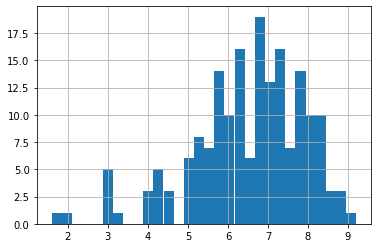

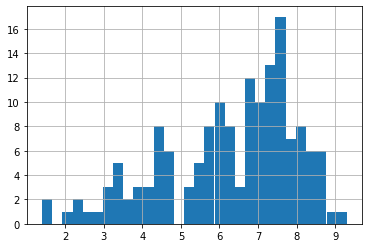

Выборки 1 и 2 имеют дисперсии 1.896484375 и 3.015625 соответственно
Выборки 1 и 2 имеют размеры 182 и 155 соответственно


In [22]:
# подготовим выборки
sample_1 = actual_data.query('(user_score > 0) and (platform == "XOne")')['user_score']
sample_2 = actual_data.query('(user_score > 0) and (platform == "PC")')['user_score']

# оценим визуально распределения выборок
sample_1.hist(bins=30)
plt.show()
sample_2.hist(bins=30)
plt.show()

# посчитаем дисперсии выборок
var1 = np.var(sample_1)
var2 = np.var(sample_2)

# оценим размер выборок
len1 = len(sample_1)
len2 = len(sample_2)

# выведем рассчитанные показатели на экран
print(f'Выборки 1 и 2 имеют дисперсии {var1} и {var2} соответственно')
print(f'Выборки 1 и 2 имеют размеры {len1} и {len2} соответственно')

Распределение выборок в целом напоминает нормальное, поэтому для проверки гипотез мы можем применять критерий Стьюдента.
С учётом размеров выборок, [методические рекомендации](https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/) предлагают принять уровень статистической значимости равный 0,01.
С учётом значений дисперсии можно принять значение `equal_var` при проведении проверки равным `False`

In [23]:
# задаём критический уровень статистической значимости
alpha = 0.01

# проводим тест
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

# выводим результат теста
print('p-значение: ', results.pvalue)

# проверяем гипотезу
if results.pvalue < alpha / 2:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.14414956265829446
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтверждена. Средние рейтинги по этим платформам равны в рамках статистической значимости. Проверим относительную разницу в рейтингах:

In [24]:
print('Средний пользовательский рейтинг на платформе Xbox One: {:.2f}'.format(sample_1.mean()))
print('Средний пользовательский рейтинг на платформе PC: {:.2f}'.format(sample_2.mean()))
print('Наибольший из двух средних отличается от наименьшего на {:.2%}'.format(abs(sample_1.mean() - sample_2.mean())/max(sample_1.mean(), sample_2.mean())))

Средний пользовательский рейтинг на платформе Xbox One: 6.52
Средний пользовательский рейтинг на платформе PC: 6.27
Наибольший из двух средних отличается от наименьшего на 3.89%


Действительно, отличие незначительное

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Сформируем нулевую и альтернативную гипотезы:

H<sub>0</sub>: средние пользовательские рейтинги указанных жанров равны<br>
H<sub>1</sub>: средние пользовательские рейтинги указанных жанров отличаются

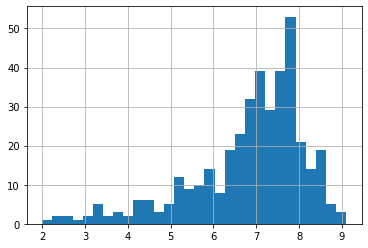

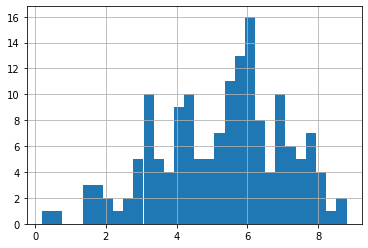

Выборки 1 и 2 имеют дисперсии 1.7646484375 и 3.16015625 соответственно
Выборки 1 и 2 имеют размеры 389 и 160 соответственно


In [25]:
# подготовим выборки
sample_1 = actual_data.query('(user_score > 0) and (genre == "Action")')['user_score']
sample_2 = actual_data.query('(user_score > 0) and (genre == "Sports")')['user_score']

# оценим визуально распределение данных
sample_1.hist(bins=30)
plt.show()
sample_2.hist(bins=30)
plt.show()

# посчитаем дисперсии выборок
var1 = np.var(sample_1)
var2 = np.var(sample_2)

# оценим размер выборок
len1 = len(sample_1)
len2 = len(sample_2)

# выведем рассчитанные показатели на экран 
print(f'Выборки 1 и 2 имеют дисперсии {var1} и {var2} соответственно')
print(f'Выборки 1 и 2 имеют размеры {len1} и {len2} соответственно')

Распределение выборок в целом напоминает нормальное, поэтому для проверки гипотез мы можем применять критерий Стьюдента.
С учётом размеров выборок, [методические рекомендации](https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/) предлагают принять уровень статистической значимости равный 0,01.
С учётом значений дисперсии можно принять значение `equal_var` при проведении проверки равным `False`

In [26]:
# задаём критический уровень статистической значимости
alpha = 0.01

# проводим тест
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

# выводим результат теста
print('p-значение: ', results.pvalue)

# проверяем гипотезу
if results.pvalue < alpha / 2:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.5834781245696843e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно мы принимаем альтернативную гипотезу - средние рейтинги этих жанров не равны в рамках статистической значимости. Таким образом, гипотеза №2 также подтверждена. Проверим относительную разницу в рейтингах

In [27]:
print('Средний пользовательский рейтинг жанра Action: {:.2f}'.format(sample_1.mean()))
print('Средний пользовательский рейтинг жанра Sports: {:.2f}'.format(sample_2.mean()))
print('Наибольший из двух средних отличается от наименьшего на {:.2%}'.format(abs(sample_1.mean() - sample_2.mean())/max(sample_1.mean(), sample_2.mean())))

Средний пользовательский рейтинг жанра Action: 6.84
Средний пользовательский рейтинг жанра Sports: 5.24
Наибольший из двух средних отличается от наименьшего на 23.41%


Разница действительно существенная

### Вывод по разделу

Мы провели проверку предложенных нам гипотез и установили, что гипотеза №1 верна, и средние пользовательские рейтинги для платформ Xbox One и PC равны в рамках статистической значимости. Относительная разница между средними составила всего 3,89%.

Гипотеза №2 также верна - средние рейтинги жанров Action и Sports отличаются. Средний рейтинг жанра Action больше на 23,41%.

Для проверки гипотез мы использовали критерий Стьюдента. Его применение мы обосновали, т.к. первоначально провели изучение сравниваемых выборок и оценку их дисперсий и размерности.

## Общий вывод

При планировании кампании на 2017 год нам нужно учесть следующее:

Для европейского и североамериканского сегмента нашего магазина нам нужно сосредоточится на консолях, активно набирающих обороты - это PlayStation 4 и Xbox One. При этом пока рано списывать со счетов следующие платформы:
- "вечная" платформа PC
- платформы, которые клонятся к закату, но ещё показывают неплохие продажи: PlayStation 3, Xbox 360, Nintendo 3DS, WiiU, PlayStation Vita

С них мы ещё можем получить достаточную прибыль.

Жанры, на которые необходимо обратить внимание в этом сегменте:
 - Action
 - Shooter
 - Sports
 - Role-Playing
 - Racing


При выборе отдельных игр для рекламы можно не опасаться жёстких возрастных рейтингов - у них высокие продажи, игроков этих регионов они не пугают.


Для японского сегмента всё не так просто. Основную ставку делаем на платформу Nintendo 3DS - у неё самые высокие продажи. И аккуратно выбираем игры для продвижения на платформе PlayStation 4 - она хоть и растёт в целом, но в данном регионе продажи не слишком высокие.
Основные жанры, на которые стоит обратить внимание в этом сегменте:
 - Role-Playing
 - Action
 
В уме также держим Fighting и Shooter.


При выборе отдельных игр для рекламы придётся опасаться жёстких возрастных рейтингов по версии ESRB - у них малая доля  рынка, игроков эти игры мало интересуют. Лучше повнимательнее изучить местный внутренний игровой рынок и посмотреть на те игры, которые не имеют рейтинга ESRB - возможно это игры не популярные или вообще не продающиеся за пределами Японии. У игр без рейтинга самая высокая доля продаж



Для всех сегментов также присутствует доля игр в жанре Misc - для этого жанра имеет смысл провести отдельное исследование, чтобы понять, какие игры или франшизы из него популярны в каждом регионе, вышли они (или выйдут ли) на актуальных для мира и региона платформах.

Также при планировании кампании стоит особое внимание уделить эксклюзивам для каждой из платформ - как мы увидели, они имеют значительное влияние на продажи по платформам.

При подборе конкретных игр для платформ PlayStation4 и Xbox One стоит опираться только на оценки критиков. Как мы увидели, для этих платформ именно рейтинг критиков имеет влияние на продажи.

Для платформы Nintendo 3DS уже стоит начинать прислушиваться к мнению пользователей - там начинает зарождаться влияние пользовательского рейтинга на продажи. Однозначно стоит начать мониторить профильное комьюнити, чтобы ассортимент магазина наилучшим образом соответствовал ожиданиям игроков.